In [13]:
import os
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [14]:
data_folder = "/Users/yujunzhong/Documents/study/UdeM_Mila/courses/IFT6390/competition/comp2/data/kaggle-competition-2/new"
train_data = pd.read_csv(os.path.join(data_folder, "train.csv"), encoding='latin-1')
val_data = pd.read_csv(os.path.join(data_folder, "val.csv"), encoding='latin-1')

In [9]:
def train_nb_gs(train_data, val_data):
    """ grid search for Naive Bayes Model.
    :param train_data: transformed training data
    :param val_data: transformed validation data
    :return: classifiers
    """
    Train_X, Train_Y, Test_X, Test_Y = train_data['text'], train_data['label'], val_data['text'], val_data['label']

    text_clf_nb = Pipeline([
        ('vect', CountVectorizer()),
        ('clf-nb', MultinomialNB()),
    ])

    # grid search
    parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                    'clf-nb__alpha': (1.0, 0.1, 0.01),
    }
    gs_clf = GridSearchCV(text_clf_nb, parameters, n_jobs=3)
    gs_clf = gs_clf.fit(Train_X, Train_Y)

    return gs_clf

In [10]:
gs_clf = train_nb_gs(train_data, val_data)


print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.7969166706631305
{'clf-nb__alpha': 1.0, 'vect__ngram_range': (1, 2)}


<AxesSubplot: >

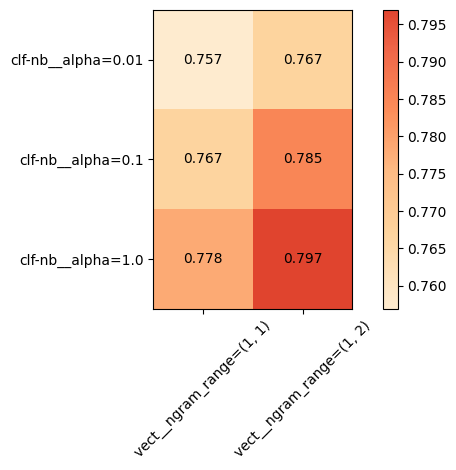

In [16]:
from sklearn_evaluation import plot

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'clf-nb__alpha': (1.0, 0.1, 0.01),
}
plot.grid_search(gs_clf.cv_results_, change=parameters, kind='bar')

In [23]:
def train_svm_gs(train_data, val_data):
    """ grid search for the SVM Model.
    :param train_data: transformed training data
    :param val_data: transformed validation data
    :return: classifiers
    """
    Train_X, Train_Y, Test_X, Test_Y = train_data['text'], train_data['label'], val_data['text'], val_data['label']

    text_clf_svm = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf-svm', LinearSVC(loss='hinge', C=1.0, class_weight='balanced')),
    ])

    # grid search
    parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                    'tfidf__use_idf': (True, False),
                    'clf-svm__C': (0.5, 1),
    }
    gs_clf = GridSearchCV(text_clf_svm, parameters, n_jobs=3)
    gs_clf = gs_clf.fit(Train_X, Train_Y)

    print(gs_clf.best_score_) # 0.7969166706631305
    print(gs_clf.best_params_) # {'vect__ngram_range': (1, 2)}
    return gs_clf

In [24]:
gs_clf = train_svm_gs(train_data, val_data)

print(gs_clf.best_score_)
print(gs_clf.best_params_)

/Users/yujunzhong/miniconda3/envs/ift6390/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunzhong/miniconda3/envs/ift6390/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunzhong/miniconda3/envs/ift6390/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunzhong/miniconda3/envs/ift6390/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunzhong/miniconda3/envs/ift6390/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/User

0.8233405328853294
{'clf-svm__C': 1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


/Users/yujunzhong/miniconda3/envs/ift6390/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<AxesSubplot: >

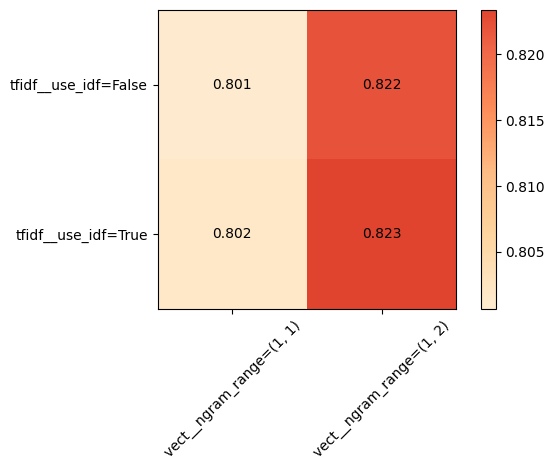

In [44]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf-svm__C': (0.5, 1),
}
plot.grid_search(gs_clf.cv_results_, change=('vect__ngram_range', 'tfidf__use_idf'), subset={'clf-svm__C': 1})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='clf-svm__C', ylabel='Mean score'>

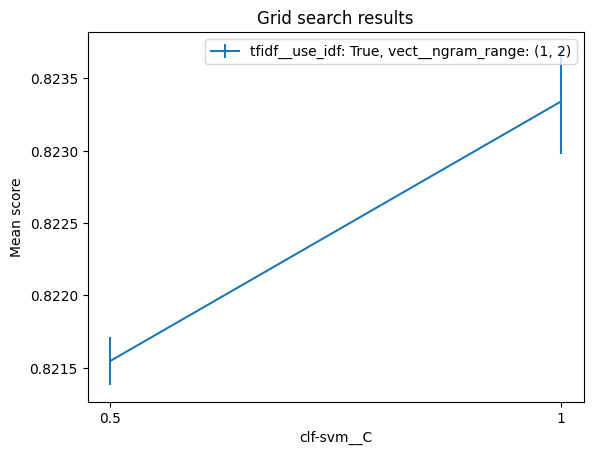

In [42]:
plot.grid_search(gs_clf.cv_results_, change=('clf-svm__C'), subset={'vect__ngram_range': [(1, 2)], 'tfidf__use_idf': [True]})